# Toward Data-Driven Weather Types

## Hierarchical Clustering with 20 PCs Derived from NCEP-CFSR


In [8]:
def read_pcs(fname):
    ''' Read PCs from specified file.'''
    import pandas as pd
    import numpy as np
    data = pd.read_csv(fname, header=None, index_col=0)
    data.columns = ["pc"+str(i+1) for i in range(20)]
    return(data.iloc[8037:,:10])

data = read_pcs('../data/svd/mslp.svd20.csv')
print(data.shape)
print(data.head())

(3651, 10)
               pc1       pc2       pc3       pc4       pc5       pc6  \
0                                                                      
20010102  1.104726  0.113931  2.281059  1.459501  2.665519  1.276082   
20010103  1.365795 -0.541943  1.948497  1.533776  1.607399  0.845829   
20010104  1.500490 -0.970183  2.334393  1.534479  0.953957  0.157180   
20010105  1.609621 -0.775556  2.573989  1.183216 -0.178107 -1.147345   
20010106  1.685995 -0.040866  2.708186  0.295700 -1.154045 -1.032183   

               pc7       pc8       pc9      pc10  
0                                                 
20010102  1.051039 -0.648542 -1.181529  0.254215  
20010103  1.070190  0.570600 -2.070319  0.417460  
20010104 -0.288291  0.842420 -1.880164 -0.220147  
20010105 -1.060598  0.430593 -2.133638 -1.285589  
20010106 -1.987670 -0.341859 -2.072252 -0.691632  


In [9]:
# Define all fields to read
layers = ['mslp','rh925','t925','u925','v925','rh800','t800','u800','v800','rh700','t700','u700','v700','h500','u200','v200']
# Read and merge all layers
for l in layers[1:]:
    fname = '../data/svd/'+l+'.svd20.csv'
    tmp = read_pcs(fname)
    data = data.merge(tmp, left_index=True, right_index=True, suffixes=("","_"+l))

print(data.shape)
print(data.columns)

(3651, 160)
Index(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
       ...
       'pc1_v200', 'pc2_v200', 'pc3_v200', 'pc4_v200', 'pc5_v200', 'pc6_v200',
       'pc7_v200', 'pc8_v200', 'pc9_v200', 'pc10_v200'],
      dtype='object', length=160)


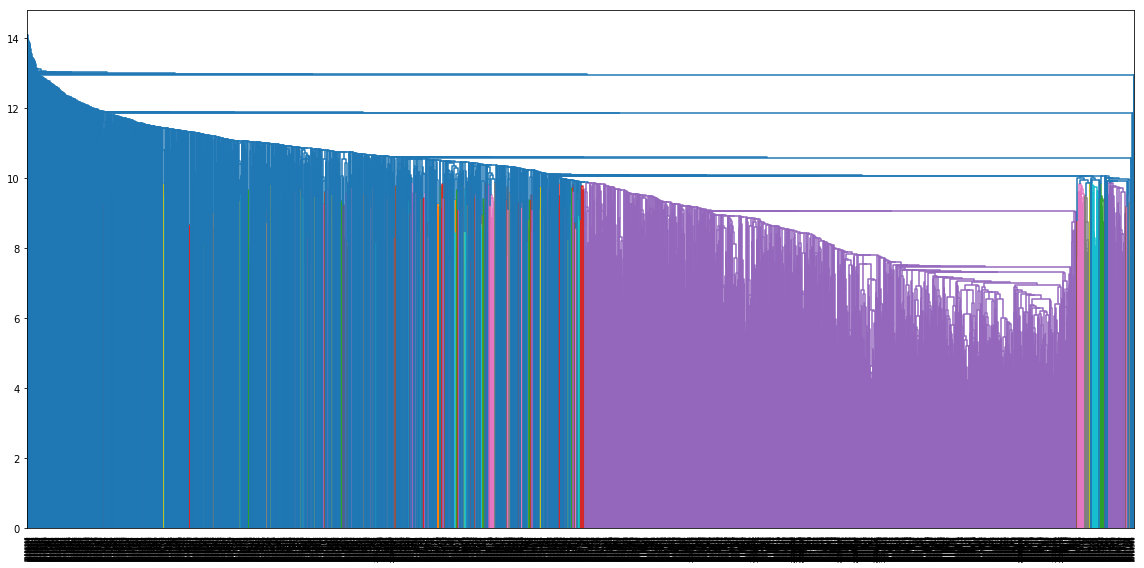

In [10]:
# Hierarchical Clustering

%matplotlib inline
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage  
import sys
sys.setrecursionlimit(2000)

linked = linkage(data, 'single')
labelList = data.index

plt.figure(figsize=(16, 8))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.tight_layout()
plt.show()

[3 3 3 ... 3 3 3]


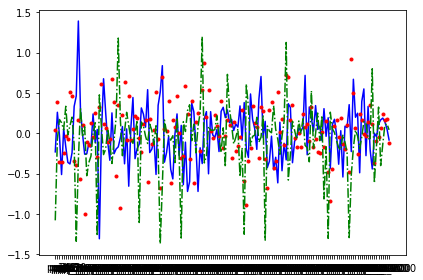

In [13]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
hc.fit_predict(data) 

print(hc.labels_)

plt.plot(data.T.iloc[:,hc.labels_==0].mean(axis=1),'b-')
plt.plot(data.T.iloc[:,hc.labels_==1].mean(axis=1),'r.')
plt.plot(data.T.iloc[:,hc.labels_==2].mean(axis=1),'g-.')
plt.tight_layout()
plt.show()